# Import Librarry

In [1]:
import numpy as np
import os
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras_preprocessing import image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Import Data Image

In [5]:
path='/content/drive/MyDrive/Data_New'

In [7]:
X = []
y = []
size = (244,244)

for label in os.listdir(path):
  for directory in os.listdir(os.path.join(path,label)):
     im = image.load_img(os.path.join(os.path.join(path,label),directory), target_size=(244,244))
     im=image.img_to_array(im) 
     X.append(im)
     y.append(label) 
     
X = np.array(X)
y = np.array(y)


## Label Encorder

In [8]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_encode = le.transform(y)

In [9]:
y_one_hot = tf.keras.utils.to_categorical(y_encode, num_classes=4)

## Data Normalize

In [10]:
X = X / 255.0

## Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build Model

## Densenet-201 Model

In [12]:
model_densenet = tf.keras.applications.densenet.DenseNet201(
    include_top=False,
    weights='imagenet',
    input_shape=(244,244,3),
  
)

model_densenet.summary()

74850304/74836368 [==============================] - 0s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 250, 250, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 122, 122, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

### Delete Model Trainable

In [13]:
for layer in model_densenet.layers:
  layer.trainable = False

model_densenet.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 250, 250, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 122, 122, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

### Feature Extraxtor 

In [14]:
X_feature_extraxtor = model_densenet.predict(X_train)
features_den = X_feature_extraxtor.reshape(X_feature_extraxtor.shape[0],-1)

Test_feature_extraxtor = model_densenet.predict(X_test)
Test_features_den = Test_feature_extraxtor.reshape(Test_feature_extraxtor.shape[0],-1)

### SVM model

In [15]:
from sklearn import svm
import seaborn as sns
clf = svm.SVC()
clf.fit(features_den, y_train)

SVC()

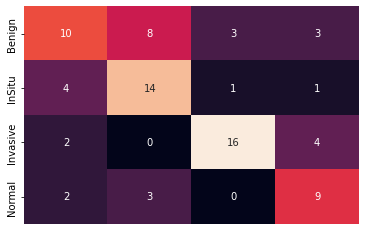

In [16]:
y_pred1=clf.predict(Test_features_den)
results1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(results1, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [17]:
FP = results1.sum(axis=0) - np.diag(results1) 
FN = results1.sum(axis=1) - np.diag(results1)
TP = np.diag(results1)
TN = results1.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.80625
REC: 0.6216991341991343
PRE: 0.6112418300653595
F1: 0.6102406554019457


# Naive Bayes

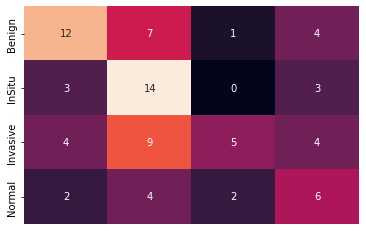

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features_den, y_train)
y_pred2 = gnb.predict(Test_features_den)
results2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(results2, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [19]:
FP = results2.sum(axis=0) - np.diag(results2) 
FN = results2.sum(axis=1) - np.diag(results2)
TP = np.diag(results2)
TN = results2.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.73125
REC: 0.46396103896103896
PRE: 0.4902836134453782
F1: 0.44307048984468334


# Decicion Tree

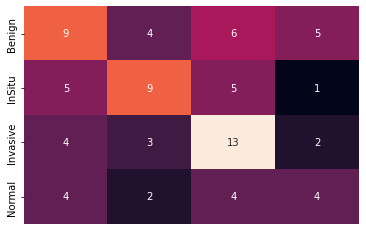

In [20]:
from sklearn import tree
gnb = GaussianNB()
tre = tree.DecisionTreeClassifier()
tre.fit(features_den, y_train)
y_pred3 = tre.predict(Test_features_den)
results3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(results3, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [21]:
FP = results3.sum(axis=0) - np.diag(results3) 
FN = results3.sum(axis=1) - np.diag(results3)
TP = np.diag(results3)
TN = results3.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.7187499999999999
REC: 0.42540584415584415
PRE: 0.4266774891774892
F1: 0.42317021651117764


# KNN

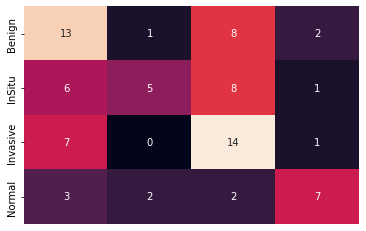

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(features_den, y_train)
y_pred4 = neigh.predict(Test_features_den)
results4 = confusion_matrix(y_test, y_pred4)
sns.heatmap(results4, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [23]:
FP = results4.sum(axis=0) - np.diag(results4) 
FN = results4.sum(axis=1) - np.diag(results4)
TP = np.diag(results4)
TN = results4.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.7437499999999999
REC: 0.48200757575757575
PRE: 0.5367848746081505
F1: 0.4815568533493062


# Proposed Model

In [24]:
import tensorflow as tf

proposed_model =tf.keras.models.load_model('/content/modelFCNNDNSRST.h5')
proposed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 4)                 128500    
                                                                 
Total params: 538,708
Trainable params: 524,628
Non-trainable params: 14,080
_________________________________________________________________


In [25]:
for layer in proposed_model.layers:
  layer.trainable = False

proposed_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 4)                 128500    
                                                                 
Total params: 538,708
Trainable params: 0
Non-trainable params: 538,708
_________________________________________________________________


In [26]:
X_feature_extraxtor = model_densenet.predict(X_train)
features = X_feature_extraxtor.reshape(X_feature_extraxtor.shape[0],-1)

Test_feature_extraxtor = model_densenet.predict(X_test)
Test_features = Test_feature_extraxtor.reshape(Test_feature_extraxtor.shape[0],-1)

### SVM model

In [27]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced')
clf.fit(features, y_train)

SVC(class_weight='balanced')

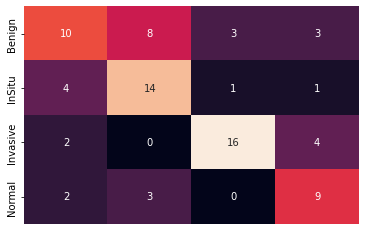

In [28]:
y_pred_1=clf.predict(Test_features)
results_1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(results_1, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [29]:
FP = results_1.sum(axis=0) - np.diag(results_1) 
FN = results_1.sum(axis=1) - np.diag(results_1)
TP = np.diag(results4)
TN = results_1.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.80625
REC: 0.5548400673400673
PRE: 0.5439980158730159
F1: 0.5418494152046783


# Naive Bayes

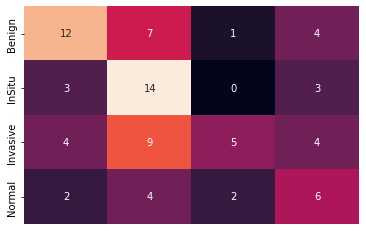

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(features, y_train)
y_pred_2 = gnb.predict(Test_features)
results_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(results_2, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [31]:
FP = results_2.sum(axis=0) - np.diag(results_2) 
FN = results_2.sum(axis=1) - np.diag(results_2)
TP = np.diag(results_2)
TN = results_2.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.73125
REC: 0.46396103896103896
PRE: 0.4902836134453782
F1: 0.44307048984468334


# Decicion Tree

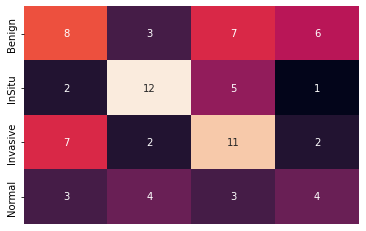

In [32]:
from sklearn import tree
gnb = GaussianNB()
tre = tree.DecisionTreeClassifier(max_depth=10)
tre.fit(features, y_train)
y_pred_3 = tre.predict(Test_features)
results_3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(results_3, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [33]:
FP = results_3.sum(axis=0) - np.diag(results_3) 
FN = results_3.sum(axis=1) - np.diag(results_3)
TP = np.diag(results_3)
TN = results_3.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.71875
REC: 0.4297619047619048
PRE: 0.42554945054945054
F1: 0.42590796173113243


# KNN

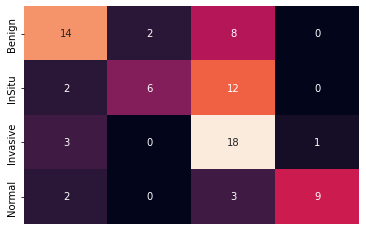

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(features, y_train)
y_pred_4 = neigh.predict(Test_features)
results_4 = confusion_matrix(y_test, y_pred_4)
sns.heatmap(results_4, annot=True,cbar=False,xticklabels=False,yticklabels=['Benign','InSitu','Invasive','Normal'])

In [35]:
FP = results_4.sum(axis=0) - np.diag(results_4) 
FN = results_4.sum(axis=1) - np.diag(results_4)
TP = np.diag(results_4)
TN = results_4.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

#f1
F1=(2*TP)/((2*TP)+FP+FN)

print("ACC:",np.average(ACC))
print("REC:",np.average(TPR))
print("PRE:",np.average(PPV))
print("F1:",np.average(F1))


ACC: 0.79375
REC: 0.5860930735930736
PRE: 0.6889227642276422
F1: 0.5930555555555556
